In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 创建对象

###  使用传递的值列表序列来创建序列, 让 pandas 创建默认整数索引

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])

In [3]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

### 使用传递的numpy数组创建数据帧,并使用日期索引和标记列:

In [4]:
dates = pd.date_range('20130101', periods=6)

In [5]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [6]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))

In [7]:
df

,A,B,C,D
2013-01-01,0.830988,0.211301,-0.926818,-0.613411
2013-01-02,-1.314992,0.532977,1.192366,-1.106847
2013-01-03,0.890640,-1.036566,-2.189510,-0.397050
2013-01-04,1.565294,-0.901578,1.148267,0.287584
2013-01-05,0.180890,2.301889,-0.003075,0.478628
2013-01-06,-0.050440,-0.840614,-0.547810,-0.396750


### 使用传递的可转换序列的字典对象创建数据帧:

In [8]:
df2 = pd.DataFrame({
    'A': 1.,
    'B': pd.Timestamp('20130101'),
    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
    'D': np.array([3] * 4, dtype='int32'),
    'E': pd.Categorical(['test', 'train', 'test', 'train']),
    'F': 'foo'
})

In [9]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-01,1.0,3,test,foo
1,1.0,2013-01-01,1.0,3,train,foo
2,1.0,2013-01-01,1.0,3,test,foo
3,1.0,2013-01-01,1.0,3,train,foo


### 所有明确类型:

In [10]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

### 输出某个子集:

In [11]:
df2.E

0     test
1    train
2     test
3    train
Name: E, dtype: category
Categories (2, object): [test, train]

# 查看数据

### 查看帧顶部和底部的行:

In [12]:
df.head()

,A,B,C,D
2013-01-01,0.830988,0.211301,-0.926818,-0.613411
2013-01-02,-1.314992,0.532977,1.192366,-1.106847
2013-01-03,0.890640,-1.036566,-2.189510,-0.397050
2013-01-04,1.565294,-0.901578,1.148267,0.287584
2013-01-05,0.180890,2.301889,-0.003075,0.478628


In [13]:
df.tail(3)

,A,B,C,D
2013-01-04,1.565294,-0.901578,1.148267,0.287584
2013-01-05,0.180890,2.301889,-0.003075,0.478628
2013-01-06,-0.050440,-0.840614,-0.547810,-0.396750


### 显示索引, 列, 和底层的 numpy 数据:

In [14]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [15]:
df.columns

Index([u'A', u'B', u'C', u'D'], dtype='object')

In [16]:
df.values

array([[ 0.83098768,  0.21130117, -0.92681805, -0.61341131],
       [-1.31499226,  0.53297706,  1.19236594, -1.10684677],
       [ 0.89064029, -1.03656616, -2.18951045, -0.39705036],
       [ 1.56529377, -0.90157838,  1.14826665,  0.28758407],
       [ 0.18088986,  2.3018887 , -0.00307499,  0.47862784],
       [-0.05043964, -0.84061391, -0.54780954, -0.39674995]])

### 描述显示数据快速统计摘要:

In [17]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.350397,0.044568,-0.221097,-0.291308
std,0.996165,1.281361,1.296148,0.586357
min,-1.314992,-1.036566,-2.189510,-1.106847
25%,0.007393,-0.886337,-0.832066,-0.559321
50%,0.505939,-0.314656,-0.275442,-0.396900
75%,0.875727,0.452558,0.860431,0.116501
max,1.565294,2.301889,1.192366,0.478628


### 转置数据:

In [18]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,0.830988,-1.314992,0.890640,1.565294,0.180890,-0.050440
B,0.211301,0.532977,-1.036566,-0.901578,2.301889,-0.840614
C,-0.926818,1.192366,-2.189510,1.148267,-0.003075,-0.547810
D,-0.613411,-1.106847,-0.397050,0.287584,0.478628,-0.396750


### 按轴排序:

In [19]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.613411,-0.926818,0.211301,0.830988
2013-01-02,-1.106847,1.192366,0.532977,-1.314992
2013-01-03,-0.397050,-2.189510,-1.036566,0.890640
2013-01-04,0.287584,1.148267,-0.901578,1.565294
2013-01-05,0.478628,-0.003075,2.301889,0.180890
2013-01-06,-0.396750,-0.547810,-0.840614,-0.050440


### 按值排序:

In [20]:
df.sort_values(by='B')

,A,B,C,D
2013-01-03,0.890640,-1.036566,-2.189510,-0.397050
2013-01-04,1.565294,-0.901578,1.148267,0.287584
2013-01-06,-0.050440,-0.840614,-0.547810,-0.396750
2013-01-01,0.830988,0.211301,-0.926818,-0.613411
2013-01-02,-1.314992,0.532977,1.192366,-1.106847
2013-01-05,0.180890,2.301889,-0.003075,0.478628


In [21]:
df.sort_values(by=['C', 'B'])

,A,B,C,D
2013-01-03,0.890640,-1.036566,-2.189510,-0.397050
2013-01-01,0.830988,0.211301,-0.926818,-0.613411
2013-01-06,-0.050440,-0.840614,-0.547810,-0.396750
2013-01-05,0.180890,2.301889,-0.003075,0.478628
2013-01-04,1.565294,-0.901578,1.148267,0.287584
2013-01-02,-1.314992,0.532977,1.192366,-1.106847


# 选择器

## 读取

### 选择单列, 这会产生一个序列, 等价于 df.A:

In [22]:
df['A']

2013-01-01    0.830988
2013-01-02   -1.314992
2013-01-03    0.890640
2013-01-04    1.565294
2013-01-05    0.180890
2013-01-06   -0.050440
Freq: D, Name: A, dtype: float64

### 使用 [] 选择行的片断:

In [23]:
df[0:3]

,A,B,C,D
2013-01-01,0.830988,0.211301,-0.926818,-0.613411
2013-01-02,-1.314992,0.532977,1.192366,-1.106847
2013-01-03,0.890640,-1.036566,-2.189510,-0.397050


In [24]:
df['20130102': '20130104']

,A,B,C,D
2013-01-02,-1.314992,0.532977,1.192366,-1.106847
2013-01-03,0.890640,-1.036566,-2.189510,-0.397050
2013-01-04,1.565294,-0.901578,1.148267,0.287584


## 使用标签选择

### 使用标签获取横截面:

In [25]:
df.loc[dates[0]]

A    0.830988
B    0.211301
C   -0.926818
D   -0.613411
Name: 2013-01-01 00:00:00, dtype: float64

### 使用标签选择多轴:

In [26]:
df.loc[:, ['A', 'B']]

,A,B
2013-01-01,0.830988,0.211301
2013-01-02,-1.314992,0.532977
2013-01-03,0.890640,-1.036566
2013-01-04,1.565294,-0.901578
2013-01-05,0.180890,2.301889
2013-01-06,-0.050440,-0.840614


### 显示标签切片, 包含两个端点:

In [27]:
df.loc['20130102': '20130104', ['A', 'B']]

,A,B
2013-01-02,-1.314992,0.532977
2013-01-03,0.890640,-1.036566
2013-01-04,1.565294,-0.901578


### 降低返回对象维度:

In [28]:
df.loc['20130102', ['A', 'B']]

A   -1.314992
B    0.532977
Name: 2013-01-02 00:00:00, dtype: float64

### 获取标量值:

In [29]:
df.loc[dates[0], 'A']

0.83098767923609629

### 快速访问并获取标量数据(等价上面的方法):

In [30]:
df.at[dates[0], 'A']

0.83098767923609629

## 按位置选择

### 传递整数选择位置

In [31]:
df.iloc[3]

A    1.565294
B   -0.901578
C    1.148267
D    0.287584
Name: 2013-01-04 00:00:00, dtype: float64

### 使用整数片断, 效果类似 numpy/python:

In [32]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,1.565294,-0.901578
2013-01-05,0.180890,2.301889


### 使用整数偏移定位列表, 效果类似 numpy/python 样式:

In [33]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,-1.314992,1.192366
2013-01-03,0.890640,-2.189510
2013-01-05,0.180890,-0.003075


### 显示行切片:

In [34]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,-1.314992,0.532977,1.192366,-1.106847
2013-01-03,0.890640,-1.036566,-2.189510,-0.397050


### 显示列切片:

In [35]:
df.iloc[:, 1:3]

,B,C
2013-01-01,0.211301,-0.926818
2013-01-02,0.532977,1.192366
2013-01-03,-1.036566,-2.189510
2013-01-04,-0.901578,1.148267
2013-01-05,2.301889,-0.003075
2013-01-06,-0.840614,-0.547810


### 显式获取一个值:

In [36]:
df.iloc[1, 1]

0.53297705530790285

### 快速访问一个标量(等同上个方法):

In [37]:
df.iat[1, 1]

0.53297705530790285

# 布尔索引

### 使用单个列的值选择数据:

In [38]:
df[df.A > 0]

,A,B,C,D
2013-01-01,0.830988,0.211301,-0.926818,-0.613411
2013-01-03,0.890640,-1.036566,-2.189510,-0.397050
2013-01-04,1.565294,-0.901578,1.148267,0.287584
2013-01-05,0.180890,2.301889,-0.003075,0.478628


### where 操作:

In [39]:
df[df > 0]

,A,B,C,D
2013-01-01,0.830988,0.211301,NaN,NaN
2013-01-02,NaN,0.532977,1.192366,NaN
2013-01-03,0.890640,NaN,NaN,NaN
2013-01-04,1.565294,NaN,1.148267,0.287584
2013-01-05,0.180890,2.301889,NaN,0.478628
2013-01-06,NaN,NaN,NaN,NaN


### 使用 isin() 筛选:

In [40]:
df2 = df.copy()

In [41]:
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']

In [42]:
df2

,A,B,C,D,E
2013-01-01,0.830988,0.211301,-0.926818,-0.613411,one
2013-01-02,-1.314992,0.532977,1.192366,-1.106847,one
2013-01-03,0.890640,-1.036566,-2.189510,-0.397050,two
2013-01-04,1.565294,-0.901578,1.148267,0.287584,three
2013-01-05,0.180890,2.301889,-0.003075,0.478628,four
2013-01-06,-0.050440,-0.840614,-0.547810,-0.396750,three


In [43]:
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,0.89064,-1.036566,-2.189510,-0.397050,two
2013-01-05,0.18089,2.301889,-0.003075,0.478628,four


# 赋值

### 赋值一个新列, 通过索引自动对齐数据:

In [44]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20130102', periods=6))

In [45]:
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [46]:
df['F'] = s1

In [47]:
df

,A,B,C,D,F
2013-01-01,0.830988,0.211301,-0.926818,-0.613411,NaN
2013-01-02,-1.314992,0.532977,1.192366,-1.106847,1.0
2013-01-03,0.890640,-1.036566,-2.189510,-0.397050,2.0
2013-01-04,1.565294,-0.901578,1.148267,0.287584,3.0
2013-01-05,0.180890,2.301889,-0.003075,0.478628,4.0
2013-01-06,-0.050440,-0.840614,-0.547810,-0.396750,5.0


### 按标签赋值:

In [48]:
df.at[dates[0], 'A'] = 0

In [49]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.211301,-0.926818,-0.613411,NaN
2013-01-02,-1.314992,0.532977,1.192366,-1.106847,1.0
2013-01-03,0.890640,-1.036566,-2.189510,-0.397050,2.0
2013-01-04,1.565294,-0.901578,1.148267,0.287584,3.0
2013-01-05,0.180890,2.301889,-0.003075,0.478628,4.0
2013-01-06,-0.050440,-0.840614,-0.547810,-0.396750,5.0


### 按位置赋值:

In [50]:
df.iat[0, 1] = 0

In [51]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.926818,-0.613411,NaN
2013-01-02,-1.314992,0.532977,1.192366,-1.106847,1.0
2013-01-03,0.890640,-1.036566,-2.189510,-0.397050,2.0
2013-01-04,1.565294,-0.901578,1.148267,0.287584,3.0
2013-01-05,0.180890,2.301889,-0.003075,0.478628,4.0
2013-01-06,-0.050440,-0.840614,-0.547810,-0.396750,5.0


### 通过 numpy 数组分配赋值:

In [52]:
df.loc[:, 'D'] = np.array([5] * len(df))

In [53]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.926818,5,NaN
2013-01-02,-1.314992,0.532977,1.192366,5,1.0
2013-01-03,0.890640,-1.036566,-2.189510,5,2.0
2013-01-04,1.565294,-0.901578,1.148267,5,3.0
2013-01-05,0.180890,2.301889,-0.003075,5,4.0
2013-01-06,-0.050440,-0.840614,-0.547810,5,5.0


### where 操作赋值:

In [54]:
df2 = df.copy()

In [55]:
df2[df2 > 0] = -df2

In [56]:
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.926818,-5,NaN
2013-01-02,-1.314992,-0.532977,-1.192366,-5,-1.0
2013-01-03,-0.890640,-1.036566,-2.189510,-5,-2.0
2013-01-04,-1.565294,-0.901578,-1.148267,-5,-3.0
2013-01-05,-0.180890,-2.301889,-0.003075,-5,-4.0
2013-01-06,-0.050440,-0.840614,-0.547810,-5,-5.0


# 丢失的数据

pandas 主要使用 np.nan 替换丢失的数据. 默认情况下它并不包含在计算中.

### 重建索引允许 更改/添加/删除 指定指定轴索引, 并返回数据副本:

In [57]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])

In [58]:
df1.loc[dates[0]: dates[1], 'E'] = 1

In [59]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.926818,5,NaN,1.0
2013-01-02,-1.314992,0.532977,1.192366,5,1.0,1.0
2013-01-03,0.890640,-1.036566,-2.189510,5,2.0,NaN
2013-01-04,1.565294,-0.901578,1.148267,5,3.0,NaN


### 删除任何有丢失数据的行:

In [60]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,-1.314992,0.532977,1.192366,5,1.0,1.0


### 填充丢失数据:

In [61]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.926818,5,5.0,1.0
2013-01-02,-1.314992,0.532977,1.192366,5,1.0,1.0
2013-01-03,0.890640,-1.036566,-2.189510,5,2.0,5.0
2013-01-04,1.565294,-0.901578,1.148267,5,3.0,5.0


### 获取值是否为 nana 的布尔标记:

In [62]:
 pd.isnull(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


# 运算

## 统计
计算时一般不包括丢失的数据

### 在 index 轴上计算均值:

In [63]:
df.mean()  # axis参数默认为0, 表示 index 轴

A    0.211899
B    0.009351
C   -0.221097
D    5.000000
F    3.000000
dtype: float64

### 在 column 轴上计算均值:

In [64]:
df.mean(axis=1)

2013-01-01    1.018295
2013-01-02    1.282070
2013-01-03    0.932913
2013-01-04    1.962396
2013-01-05    2.295941
2013-01-06    1.712227
Freq: D, dtype: float64

### 用于运算的对象有不同维度并需要对齐. 除此之外, pandas 会自动沿着指定维度计算:

In [65]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)

In [66]:
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [67]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.926818,5,NaN
2013-01-02,-1.314992,0.532977,1.192366,5,1.0
2013-01-03,0.890640,-1.036566,-2.189510,5,2.0
2013-01-04,1.565294,-0.901578,1.148267,5,3.0
2013-01-05,0.180890,2.301889,-0.003075,5,4.0
2013-01-06,-0.050440,-0.840614,-0.547810,5,5.0


In [68]:
df.sub(s, axis=0)

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.109360,-2.036566,-3.189510,4.0,1.0
2013-01-04,-1.434706,-3.901578,-1.851733,2.0,0.0
2013-01-05,-4.819110,-2.698111,-5.003075,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


## Apply

### 在数据上使用函数:

In [69]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.926818,5,NaN
2013-01-02,-1.314992,0.532977,0.265548,10,1.0
2013-01-03,-0.424352,-0.503589,-1.923963,15,3.0
2013-01-04,1.140942,-1.405167,-0.775696,20,6.0
2013-01-05,1.321832,0.896721,-0.778771,25,10.0
2013-01-06,1.271392,0.056107,-1.326580,30,15.0


In [70]:
df.apply(lambda x: x.max() - x.min())

A    2.880286
B    3.338455
C    3.381876
D    0.000000
F    4.000000
dtype: float64

## 直方图

In [71]:
s = pd.Series(np.random.randint(0, 7, size=10))

In [72]:
s

0    3
1    0
2    6
3    6
4    1
5    3
6    4
7    2
8    5
9    4
dtype: int64

In [73]:
s.value_counts()

6    2
4    2
3    2
5    1
2    1
1    1
0    1
dtype: int64

## 字符串方法

### 序列可以使用一些字符串处理方法, 很轻易操作数据组中的每个元素, 比如以下代码片断.
### 注意: 字符匹配方法默认情况下, 通常使用正则表达式(并且大多数时候都如此).

In [74]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [75]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

# 合并

pandas 提供各种工具以简便合并序列, 数据帧, 和组合对象. 在 连接/合并 类型操作中, 使用多种类型索引和相关数学函数.

### 把 pandas 对象连接到一起:

In [76]:
df = pd.DataFrame(np.random.randn(10, 4))

In [77]:
df

,0,1,2,3
0,1.198139,0.255351,-2.163206,-0.546918
1,-0.757948,0.719486,0.944935,0.961493
2,-1.231672,-0.301289,0.015839,0.183131
3,1.005350,0.040537,1.347831,0.562388
4,-1.560731,0.127616,2.606517,0.994567
5,1.243707,-0.522960,0.073443,0.483926
6,1.651448,0.254195,0.295707,-2.312916
7,-0.208332,-1.197274,2.738847,0.038823
8,-0.295732,-0.211062,0.181727,0.827109
9,1.247613,0.318213,-0.525624,0.119192


In [78]:
pieces = [df[:3], df[3:7], df[7:]]

In [79]:
pieces

[          0         1         2         3
 0  1.198139  0.255351 -2.163206 -0.546918
 1 -0.757948  0.719486  0.944935  0.961493
 2 -1.231672 -0.301289  0.015839  0.183131,
           0         1         2         3
 3  1.005350  0.040537  1.347831  0.562388
 4 -1.560731  0.127616  2.606517  0.994567
 5  1.243707 -0.522960  0.073443  0.483926
 6  1.651448  0.254195  0.295707 -2.312916,
           0         1         2         3
 7 -0.208332 -1.197274  2.738847  0.038823
 8 -0.295732 -0.211062  0.181727  0.827109
 9  1.247613  0.318213 -0.525624  0.119192]

In [80]:
pd.concat(pieces)

,0,1,2,3
0,1.198139,0.255351,-2.163206,-0.546918
1,-0.757948,0.719486,0.944935,0.961493
2,-1.231672,-0.301289,0.015839,0.183131
3,1.005350,0.040537,1.347831,0.562388
4,-1.560731,0.127616,2.606517,0.994567
5,1.243707,-0.522960,0.073443,0.483926
6,1.651448,0.254195,0.295707,-2.312916
7,-0.208332,-1.197274,2.738847,0.038823
8,-0.295732,-0.211062,0.181727,0.827109
9,1.247613,0.318213,-0.525624,0.119192


## 连接

### SQL 样式合并:

In [81]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})

In [82]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [83]:
left

,key,lval
0,foo,1
1,foo,2


In [84]:
right

,key,rval
0,foo,4
1,foo,5


In [85]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


## 添加

### 添加行到数据帧:

In [86]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])

In [87]:
df

,A,B,C,D
0,-1.114572,0.097531,0.022282,0.219714
1,1.040871,-2.641861,-0.197795,-0.430224
2,1.064996,-0.815516,2.375643,-2.706566
3,0.208141,0.107715,-0.163068,0.252386
4,0.921251,-0.336959,0.502700,0.802547
5,0.047286,2.025958,0.954283,1.381018
6,0.518963,-1.539909,0.021547,1.477309
7,-0.106894,0.862488,-0.828176,-0.815590


In [88]:
s = df.iloc[3]

In [89]:
df.append(s, ignore_index=True)

,A,B,C,D
0,-1.114572,0.097531,0.022282,0.219714
1,1.040871,-2.641861,-0.197795,-0.430224
2,1.064996,-0.815516,2.375643,-2.706566
3,0.208141,0.107715,-0.163068,0.252386
4,0.921251,-0.336959,0.502700,0.802547
5,0.047286,2.025958,0.954283,1.381018
6,0.518963,-1.539909,0.021547,1.477309
7,-0.106894,0.862488,-0.828176,-0.815590
8,0.208141,0.107715,-0.163068,0.252386


# 分组

对于 "group by" 指的是以下一个或多个处理:
- 将数据按某些标准分割为不同的组
- 在每个独立组上应用函数
- 组合结果为一个数据结构

In [90]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'bar'],
                   'B': ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})

In [91]:
df

,A,B,C,D
0,foo,one,-0.322029,0.593835
1,bar,one,-1.485272,0.700787
2,foo,two,0.914429,0.699238
3,bar,three,-1.552597,-0.003782
4,foo,two,3.025511,0.586944
5,bar,two,0.499808,0.383772
6,foo,one,-0.263149,-0.431824
7,bar,three,0.967752,0.946886


### 分组, 然后应用函数统计总和, 存放到结果组:

In [92]:
df.groupby('A').sum()

,C,D
A,,
bar,-1.570308,2.027663
foo,3.354763,1.448194


### 按多列分组为层次索引, 然后应用函数:

In [93]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one   -1.485272  0.700787
    three -0.584845  0.943104
    two    0.499808  0.383772
foo one   -0.585178  0.162011
    two    3.939940  1.286183

# 重塑

## 堆叠

In [94]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two','one', 'two', 'one', 'two']]))
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [95]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'seconds'])

In [96]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

In [97]:
df

A         B
first seconds                    
bar   one     -0.558695  0.105423
      two      0.271188 -0.217300
baz   one      0.093175 -0.225239
      two     -0.093316 -0.791467
foo   one     -0.145413  0.126640
      two      1.120556  1.117124
qux   one     -1.304878 -1.166168
      two      0.522716  0.857816

In [98]:
df2 = df[:4]

In [99]:
df2

A         B
first seconds                    
bar   one     -0.558695  0.105423
      two      0.271188 -0.217300
baz   one      0.093175 -0.225239
      two     -0.093316 -0.791467

### 堆叠函数, "压缩" 数据帧的列一个级别:

In [100]:
stacked = df2.stack()

In [101]:
stacked

first  seconds   
bar    one      A   -0.558695
                B    0.105423
       two      A    0.271188
                B   -0.217300
baz    one      A    0.093175
                B   -0.225239
       two      A   -0.093316
                B   -0.791467
dtype: float64

### 被 "堆叠" 数据帧或序列(有多个索引作为索引), 其堆叠的反向操作为取消堆叠, 上面的数据默认反堆叠到上一级别:

In [102]:
stacked.unstack()

A         B
first seconds                    
bar   one     -0.558695  0.105423
      two      0.271188 -0.217300
baz   one      0.093175 -0.225239
      two     -0.093316 -0.791467

In [103]:
stacked.unstack(level=1)

seconds       one       two
first                      
bar   A -0.558695  0.271188
      B  0.105423 -0.217300
baz   A  0.093175 -0.093316
      B -0.225239 -0.791467

In [104]:
stacked.unstack(level=0)

first           bar       baz
seconds                      
one     A -0.558695  0.093175
        B  0.105423 -0.225239
two     A  0.271188 -0.093316
        B -0.217300 -0.791467

## 数据透视表

### 查看数据透视表

In [105]:
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                   'B': ['A', 'B', 'C'] * 4,
                   'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D': np.random.randn(12),
                   'E': np.random.randn(12)})

In [106]:
df

,A,B,C,D,E
0,one,A,foo,1.894734,-2.293275
1,one,B,foo,-1.362782,-0.130090
2,two,C,foo,0.843821,0.649588
3,three,A,bar,0.496000,-0.623999
4,one,B,bar,0.457438,-0.495746
5,one,C,bar,-0.645673,-0.517788
6,two,A,foo,-1.247229,0.242816
7,three,B,foo,1.666903,1.620036
8,one,C,foo,-0.585036,-0.344293
9,one,A,bar,0.277802,0.688129


### 我们可以从上面的数据中, 非常容易的产生数据透视表:

In [107]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  0.277802  1.894734
      B  0.457438 -1.362782
      C -0.645673 -0.585036
three A  0.496000       NaN
      B       NaN  1.666903
      C -2.202665       NaN
two   A       NaN -1.247229
      B  0.988346       NaN
      C       NaN  0.843821

# 时间序列

pandas 有易用, 强大且高效的函数用于高频数据重采样转换操作(例如: 转换秒数据到5分钟数据).   
这是很普通的情况, 但不局限于金融应用.

### 重新采样:

In [108]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')

In [109]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [110]:
ts.resample('5MIN').sum()

2012-01-01    21689
Freq: 5T, dtype: int64

### 时区表示:

In [111]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')

In [112]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [113]:
ts

2012-03-06   -0.766239
2012-03-07    0.453263
2012-03-08   -0.490956
2012-03-09   -1.291874
2012-03-10   -0.463390
Freq: D, dtype: float64

In [114]:
ts_utc = ts.tz_localize('UTC')

In [115]:
ts_utc

2012-03-06 00:00:00+00:00   -0.766239
2012-03-07 00:00:00+00:00    0.453263
2012-03-08 00:00:00+00:00   -0.490956
2012-03-09 00:00:00+00:00   -1.291874
2012-03-10 00:00:00+00:00   -0.463390
Freq: D, dtype: float64

### 转换到其它时区:

In [116]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -0.766239
2012-03-06 19:00:00-05:00    0.453263
2012-03-07 19:00:00-05:00   -0.490956
2012-03-08 19:00:00-05:00   -1.291874
2012-03-09 19:00:00-05:00   -0.463390
Freq: D, dtype: float64

### 转换不同的时间跨度:

In [117]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')

In [118]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [119]:
ts

2012-01-31    0.095301
2012-02-29    0.408777
2012-03-31   -0.790425
2012-04-30    0.090653
2012-05-31    0.317007
Freq: M, dtype: float64

In [120]:
ps = ts.to_period()

In [121]:
ps

2012-01    0.095301
2012-02    0.408777
2012-03   -0.790425
2012-04    0.090653
2012-05    0.317007
Freq: M, dtype: float64

In [122]:
ps.to_timestamp()

2012-01-01    0.095301
2012-02-01    0.408777
2012-03-01   -0.790425
2012-04-01    0.090653
2012-05-01    0.317007
Freq: MS, dtype: float64

### 转换时段, 并且使用一些运算函数. 下例中, 我们转换年报11月到季度结束每日上午9点的数据:

In [123]:
prng = pd.period_range('1990Q1', '2004Q4', freq='Q-NOV')

In [124]:
ts = pd.Series(np.random.randn(len(prng)), index=prng)

In [125]:
ts.head()

1990Q1    1.795697
1990Q2    0.311190
1990Q3    0.626286
1990Q4   -3.022472
1991Q1    0.482668
Freq: Q-NOV, dtype: float64

In [126]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9

In [127]:
ts.head()

1990-03-01 09:00    1.795697
1990-06-01 09:00    0.311190
1990-09-01 09:00    0.626286
1990-12-01 09:00   -3.022472
1991-03-01 09:00    0.482668
Freq: H, dtype: float64

# 分类

In [128]:
df = pd.DataFrame({'id': [1, 2, 3, 4, 5, 6], 'raw_grade': ['a', 'b', 'b', 'a', 'a', 'e']})

### 转换原始类别为分类数据类型:

In [129]:
df['grade'] = df['raw_grade'].astype('category')

In [130]:
df['grade']

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

### 重命名分类为更有意义的名称(分配到 Series.cat.categories 对应位置):

In [131]:
df['grade'].cat.categories = ['very good', 'good', 'very bad']

In [132]:
df['grade']

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): [very good, good, very bad]

### 重排顺分类, 同时添加缺少的分类(序列 .cat 方法下返回新默认序列):

In [133]:
df['grade'] = df['grade'].cat.set_categories(['very bad', 'bad', 'medium', 'good', 'very good'])

In [134]:
df['grade']

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

### 排列分类中的顺序(不是按词汇排列):

In [135]:
df.sort_values('grade')

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


### 类别列分组, 并且也显示空类别:

In [136]:
df.groupby('grade').size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

# 绘画

In [137]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

In [138]:
ts = ts.cumsum()

In [139]:
ts.plot()

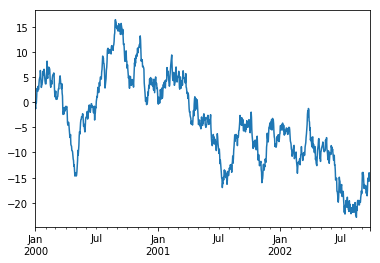

In [140]:
plt.show()

### 在数据帧中, 可以很方便的绘制带标签列:

In [141]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D'])

In [142]:
df = df.cumsum()

In [143]:
plt.figure()
df.plot()
plt.legend(loc='best')

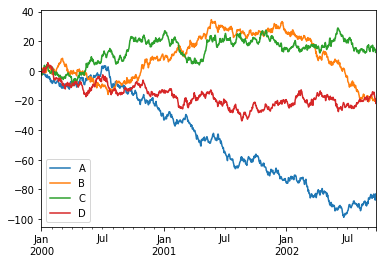

In [144]:
plt.show()

# 获取数据输入/输出

## CSV

### 写入 csv 文件:

In [145]:
df.to_csv('temp_file_foo.csv')

### 读取 csv 文件:

In [146]:
pd.read_csv('temp_file_foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,-1.199395,1.387735,-1.798714,-0.633652
1,2000-01-02,-0.908396,1.301464,-2.751684,-0.756612
2,2000-01-03,-1.214637,1.722991,-2.878235,-1.103410
3,2000-01-04,-1.444817,1.526782,-1.434901,-0.878478
4,2000-01-05,-2.336566,0.792154,0.702733,-1.161456
5,2000-01-06,-1.141497,-0.123991,0.006881,-0.231437
6,2000-01-07,-0.903127,-0.106136,-0.105336,0.636556
7,2000-01-08,-0.363628,0.484380,0.604074,2.070136
8,2000-01-09,-2.381704,-1.328455,2.261637,-0.153917
9,2000-01-10,-2.071101,-1.512707,3.693099,-0.840669


## HDF5

### 写入 HDF 存储:

In [147]:
df.to_hdf('temp_file_foo.h5', key='df')

### 读取 HDF 存储:

In [148]:
pd.read_hdf('temp_file_foo.h5', key='df')

,A,B,C,D
2000-01-01,-1.199395,1.387735,-1.798714,-0.633652
2000-01-02,-0.908396,1.301464,-2.751684,-0.756612
2000-01-03,-1.214637,1.722991,-2.878235,-1.103410
2000-01-04,-1.444817,1.526782,-1.434901,-0.878478
2000-01-05,-2.336566,0.792154,0.702733,-1.161456
2000-01-06,-1.141497,-0.123991,0.006881,-0.231437
2000-01-07,-0.903127,-0.106136,-0.105336,0.636556
2000-01-08,-0.363628,0.484380,0.604074,2.070136
2000-01-09,-2.381704,-1.328455,2.261637,-0.153917
2000-01-10,-2.071101,-1.512707,3.693099,-0.840669


## Excel

### 写入 excel 文件:

In [149]:
df.to_excel('temp_file_foo.xlsx', sheet_name='Sheet1')

### 读取 excel 文件:

In [150]:
pd.read_excel('temp_file_foo.xlsx', sheetname='Sheet1', index_col=None, na_values=['NA'])

,A,B,C,D
2000-01-01,-1.199395,1.387735,-1.798714,-0.633652
2000-01-02,-0.908396,1.301464,-2.751684,-0.756612
2000-01-03,-1.214637,1.722991,-2.878235,-1.103410
2000-01-04,-1.444817,1.526782,-1.434901,-0.878478
2000-01-05,-2.336566,0.792154,0.702733,-1.161456
2000-01-06,-1.141497,-0.123991,0.006881,-0.231437
2000-01-07,-0.903127,-0.106136,-0.105336,0.636556
2000-01-08,-0.363628,0.484380,0.604074,2.070136
2000-01-09,-2.381704,-1.328455,2.261637,-0.153917
2000-01-10,-2.071101,-1.512707,3.693099,-0.840669
